In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/mnt/home/yjo10/ceph/myutils")
import plt_utils as pu

In [3]:
def readAbyss(fname, num_particles=2,base_path="../data/output/", time_max=100, energy=False):
    ## I have to modify the abyss code to incorporate the number of particles within the output data
    with open(base_path+fname) as f:
        time = 0
        lines = f.readlines()
        num_time = int(min(time_max, len(lines)//(num_particles+1))) #+1
        print(num_time)
        particles = np.zeros((num_time,num_particles,20))
        #particles = np.zeros((len(lines)//(num_particles+1),num_particles,20))
        for line in lines[2:]:
            data = np.array(line.split())
            if data[0] == ">>>>":
                continue 
            #data = [float(i) for i in data] 
            #particles.append(Particle(np.array([float(data[i+1]) for i in range(3)]), np.array([float(data[i+4]) for i in range(3)]), np.array([float(data[i+6]) for i in range(12)]).reshape(3,4), float(data[0]), float(data[-1]))) # assuming 3D position, velocity, acceleration, mass, timestep in the input file.
            particles[time//num_particles,int(data[0]),:] = data[1:]
            #print(data[1:])
            time += 1
            if time//num_particles >= num_time:
                break; 

        if energy:
            energies = np.zeros((particles.shape[0],))
            for i in range(particles.shape[0]):
                energies[i] = compute_energy(particles[i,:,1:4], particles[i,:,4:7], particles[i,:,0])

            return particles, energies

    return particles


def compute_energy(positions, velocities, masses, G=1):
    """Computes the total energy (kinetic + potential) of an N-body system."""
    kinetic_energy = 0.5 * np.sum(masses * np.linalg.norm(velocities, axis=1)**2)
    potential_energy = 0.0

    N = len(masses)
    for i in range(N):
        for j in range(i + 1, N):
            r_ij = np.linalg.norm(positions[i,:] - positions[j,:])
            if r_ij == 0:
                continue
            potential_energy -= G * masses[i] * masses[j] / r_ij
    #print("kin=",kinetic_energy)
    #print("pot=",potential_energy)
    return kinetic_energy + potential_energy

"""
def compute_energy(self): 
    kinetic_energy   = 0.5 * (self.particle1[:,-1] * torch.norm(self.particle1[:,2:4], p=2, dim=1)**2+self.particle2[:,-1] * torch.norm(self.particle2[:,2:4], p=2, dim=1)**2)
    r = torch.norm(self.particle1[:,:2] - self.particle2[:,:2], p=2, dim=1)
    potential_energy = self.particle1[:,-1] * self.particle2[:,-1] / r
    return kinetic_energy + potential_energy
    """

class Particle:
    def __init__(self, position, velocity, acceleration, mass, timestep):
        self.Position = position
        self.Velocity = velocity
        self.Acceleration = acceleration
        self.Mass = mass
        self.TimeStep = timestep
        #self.Energy = energy


## Two body

13


IndexError: index 2 is out of bounds for axis 1 with size 2

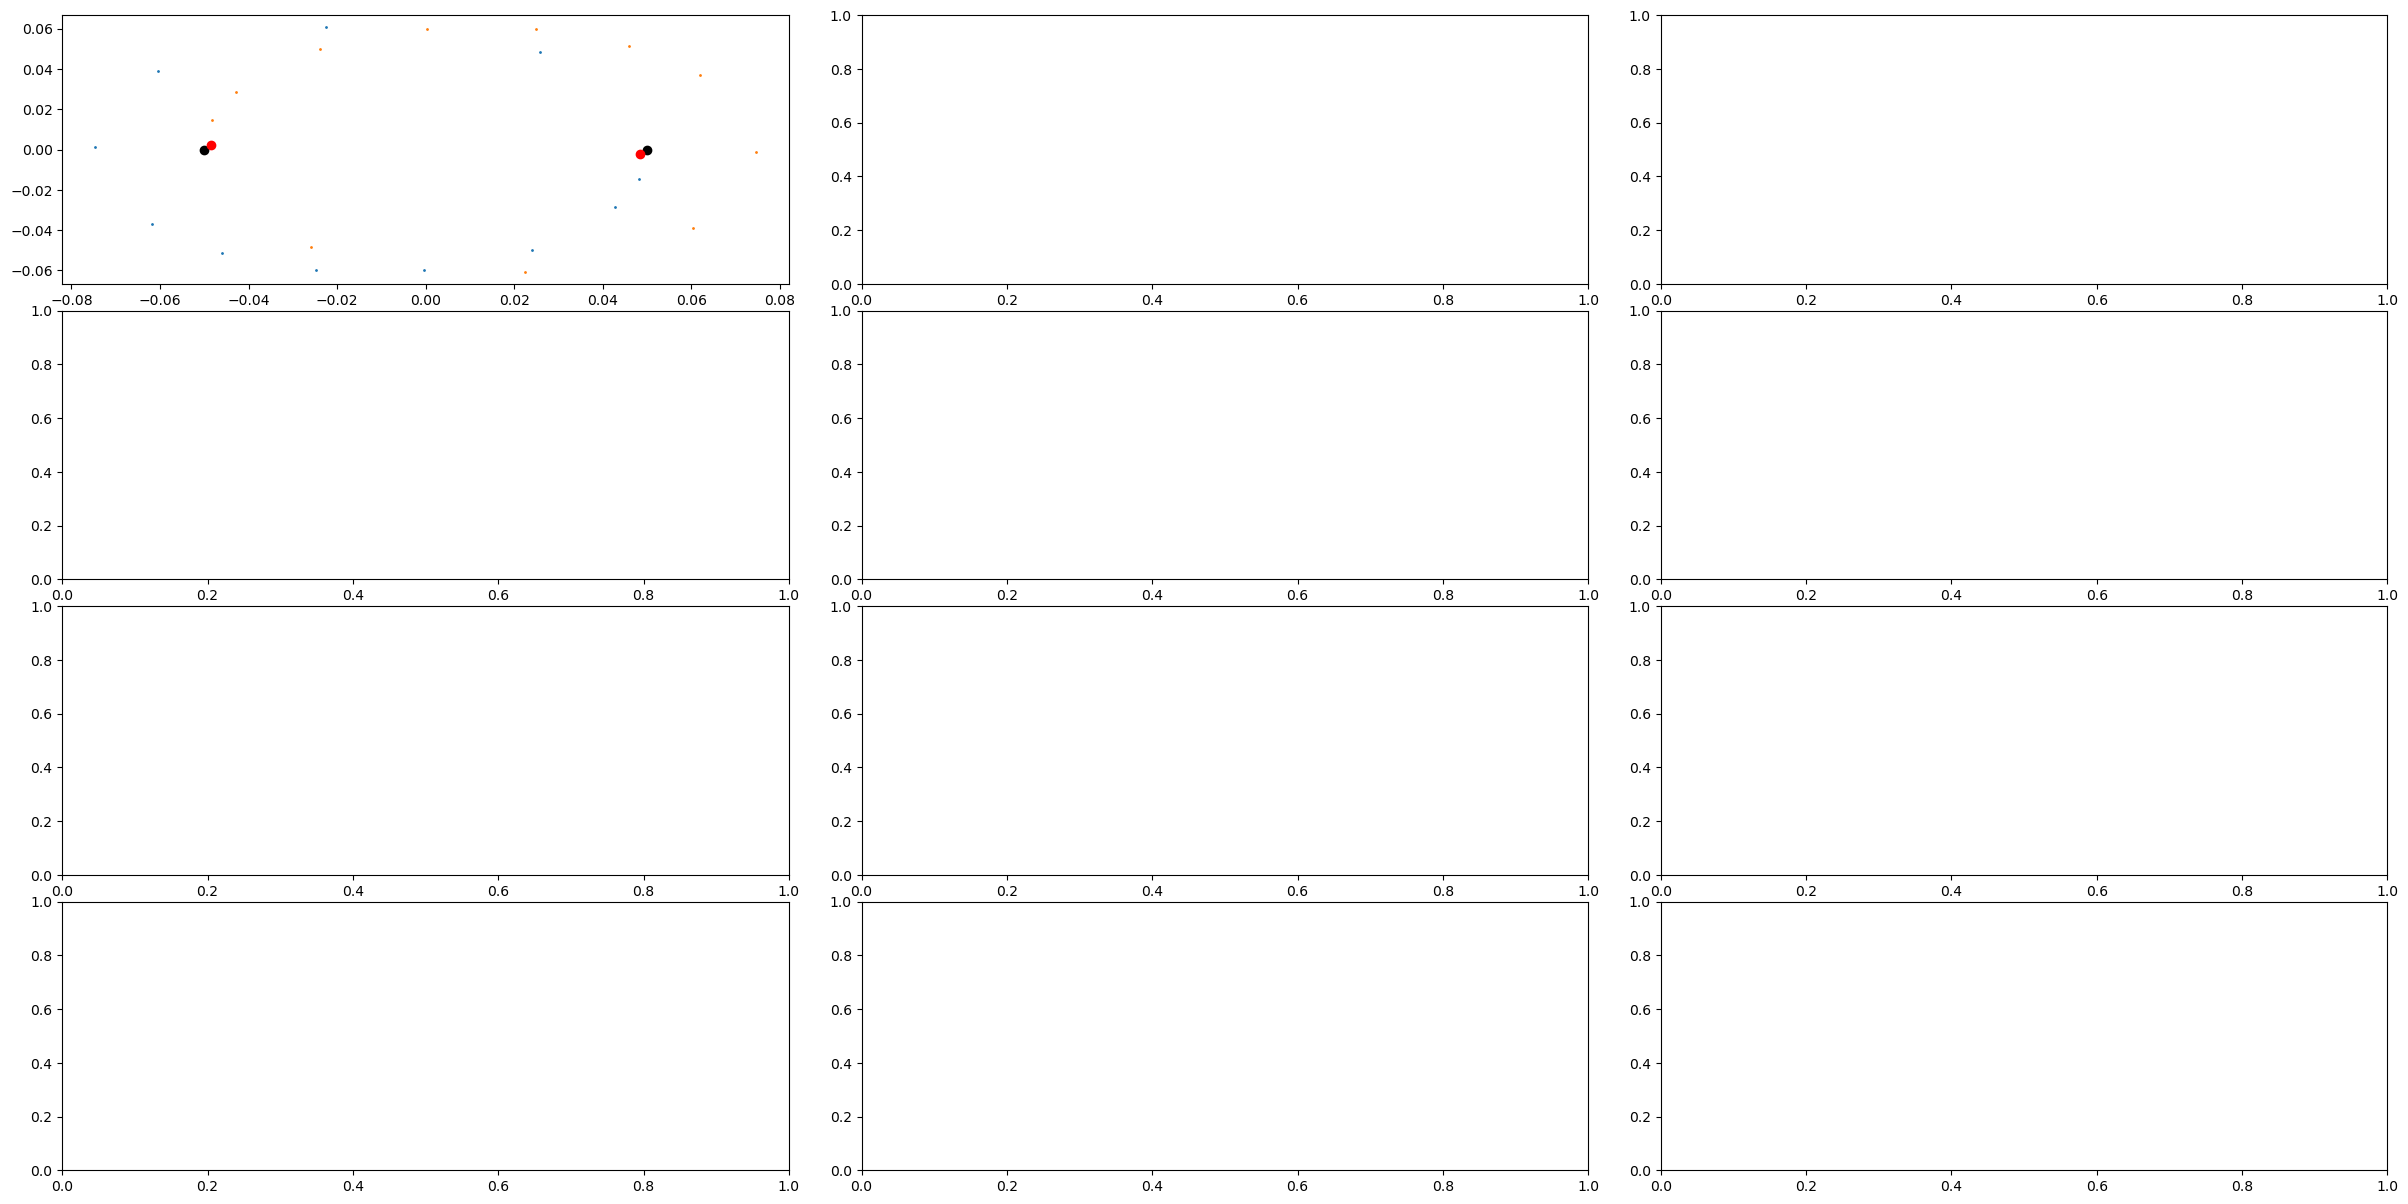

In [7]:
num_particles = 2
M = 3
fig, axes = pu.generateAxesForMultiplePlots(shape=(M,4),figsize=(30,15),hspace=0.1,wspace=0.1,
                                gridspec=None)

n=5
for m in range(M):
    particles, energies = readAbyss(f"two_body_{int(n+1)}_{int(m+1)}_new.txt", num_particles=num_particles, time_max=1e8, energy=True)
    x=m; y=0
    #particles -> [time, PID, [mass(1), pos(3), vel(3), acc(12->3,4), dt(1)]]
    for i in range(num_particles):
        axes[x,y].scatter(particles[0,i,1], particles[0,i,2], color="k",zorder=10)
        axes[x,y].scatter(particles[1:-1,i,1], particles[1:-1,i,2], s=1)
        axes[x,y].scatter(particles[-1,i,1], particles[-1,i,2], color="r",zorder=10)

    #axes[x,y].set_xlim(-1,1)
    #axes[x,y].set_ylim(-1,1)
    axes[x,y].set_xticklabels([])
    axes[x,y].set_yticklabels([])

    y=1
    for i in range(num_particles):
        axes[x,y].scatter(particles[0,i,2], particles[0,i,3], color="k",zorder=10)
        axes[x,y].scatter(particles[1:-1,i,2], particles[1:-1,i,3], s=1)
        axes[x,y].scatter(particles[-1,i,2], particles[-1,i,3], color="r",zorder=10)

    #axes[x,y].set_xlim(-1,1)
    #axes[x,y].set_ylim(-1,1)
    axes[x,y].set_xticklabels([])
    axes[x,y].set_yticklabels([])
    #axes[x,y].axis("off")

    y=2
    axes[x,y].plot(range(energies.shape[0]), np.abs((energies-energies[0])/energies[0]))
    axes[x,y].set_yscale("log")

    y=3
    axes[x,y].plot(range(energies.shape[0]), particles[:,0,-1])
    axes[x,y].plot(range(energies.shape[0]), particles[:,1,-1])
    axes[x,y].plot(range(energies.shape[0]), particles[:,2,-1])
    axes[x,y].set_yscale("log")


## Three body

10
27
418
1074
2756
131757


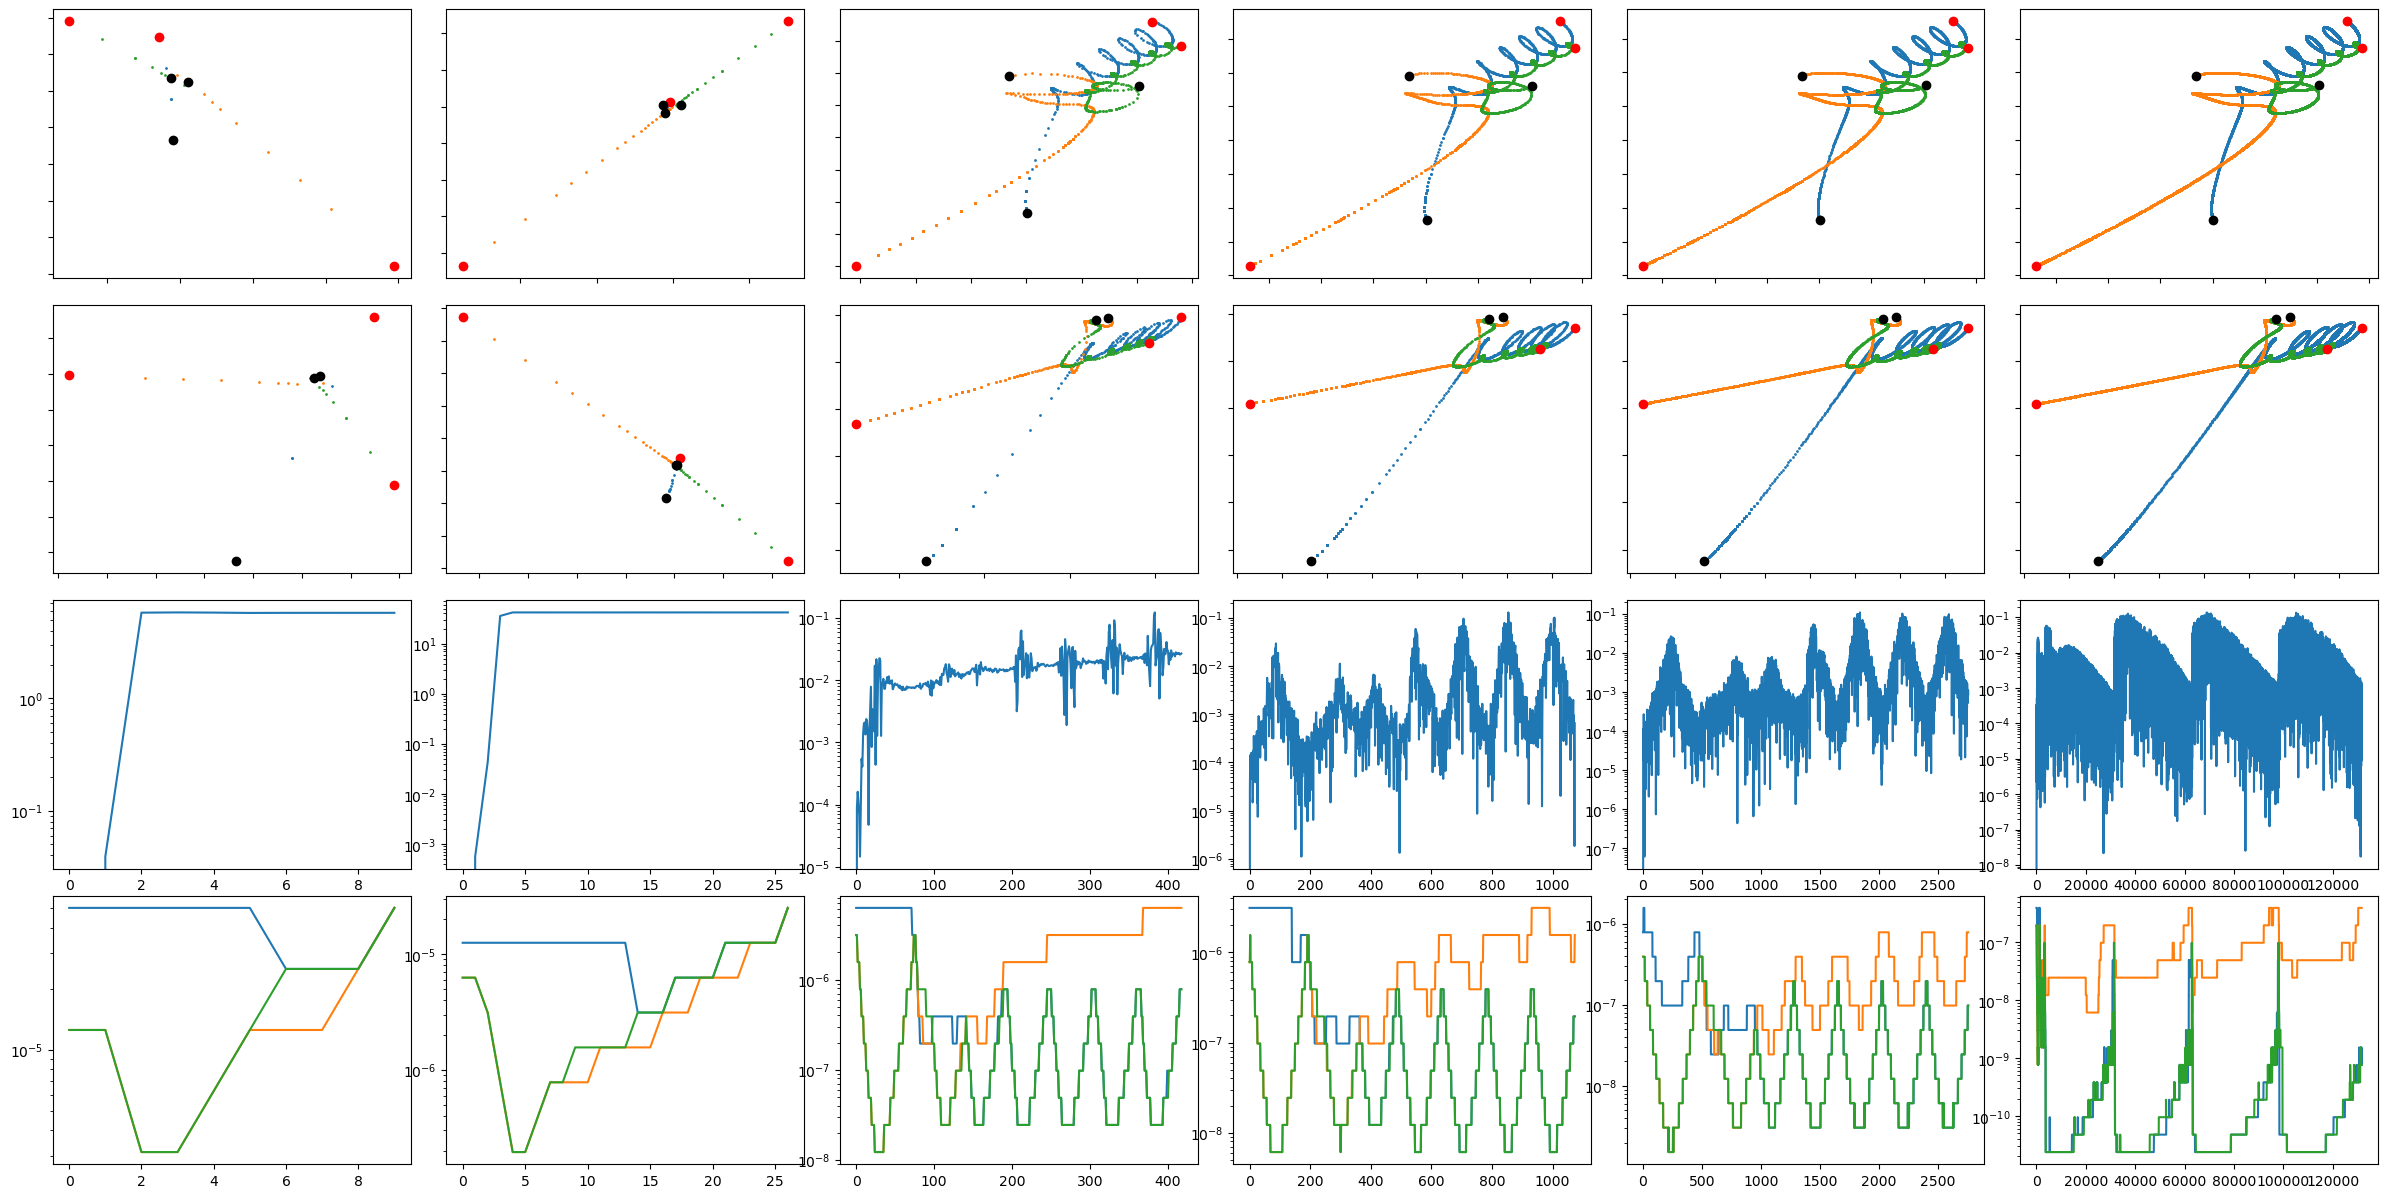

In [4]:
num_particles = 3

fig, axes = pu.generateAxesForMultiplePlots(shape=(6,4),figsize=(30,15),hspace=0.1,wspace=0.1,
                                gridspec=None)

n=5
for m in range(6):
    particles, energies = readAbyss(f"three_body_{int(n+1)}_{int(m+1)}.txt", num_particles=num_particles, time_max=1e8, energy=True)
    x=m; y=0
    #particles -> [time, PID, [mass(1), pos(3), vel(3), acc(12->3,4), dt(1)]]
    for i in range(3):
        axes[x,y].scatter(particles[0,i,1], particles[0,i,2], color="k",zorder=10)
        axes[x,y].scatter(particles[1:-1,i,1], particles[1:-1,i,2], s=1)
        axes[x,y].scatter(particles[-1,i,1], particles[-1,i,2], color="r",zorder=10)

    #axes[x,y].set_xlim(-1,1)
    #axes[x,y].set_ylim(-1,1)
    axes[x,y].set_xticklabels([])
    axes[x,y].set_yticklabels([])

    y=1
    for i in range(3):
        axes[x,y].scatter(particles[0,i,2], particles[0,i,3], color="k",zorder=10)
        axes[x,y].scatter(particles[1:-1,i,2], particles[1:-1,i,3], s=1)
        axes[x,y].scatter(particles[-1,i,2], particles[-1,i,3], color="r",zorder=10)

    #axes[x,y].set_xlim(-1,1)
    #axes[x,y].set_ylim(-1,1)
    axes[x,y].set_xticklabels([])
    axes[x,y].set_yticklabels([])
    #axes[x,y].axis("off")

    y=2
    axes[x,y].plot(range(energies.shape[0]), np.abs((energies-energies[0])/energies[0]))
    axes[x,y].set_yscale("log")

    y=3
    axes[x,y].plot(range(energies.shape[0]), particles[:,0,-1])
    axes[x,y].plot(range(energies.shape[0]), particles[:,1,-1])
    axes[x,y].plot(range(energies.shape[0]), particles[:,2,-1])
    axes[x,y].set_yscale("log")


3
41
160
398
1041
2661
151202


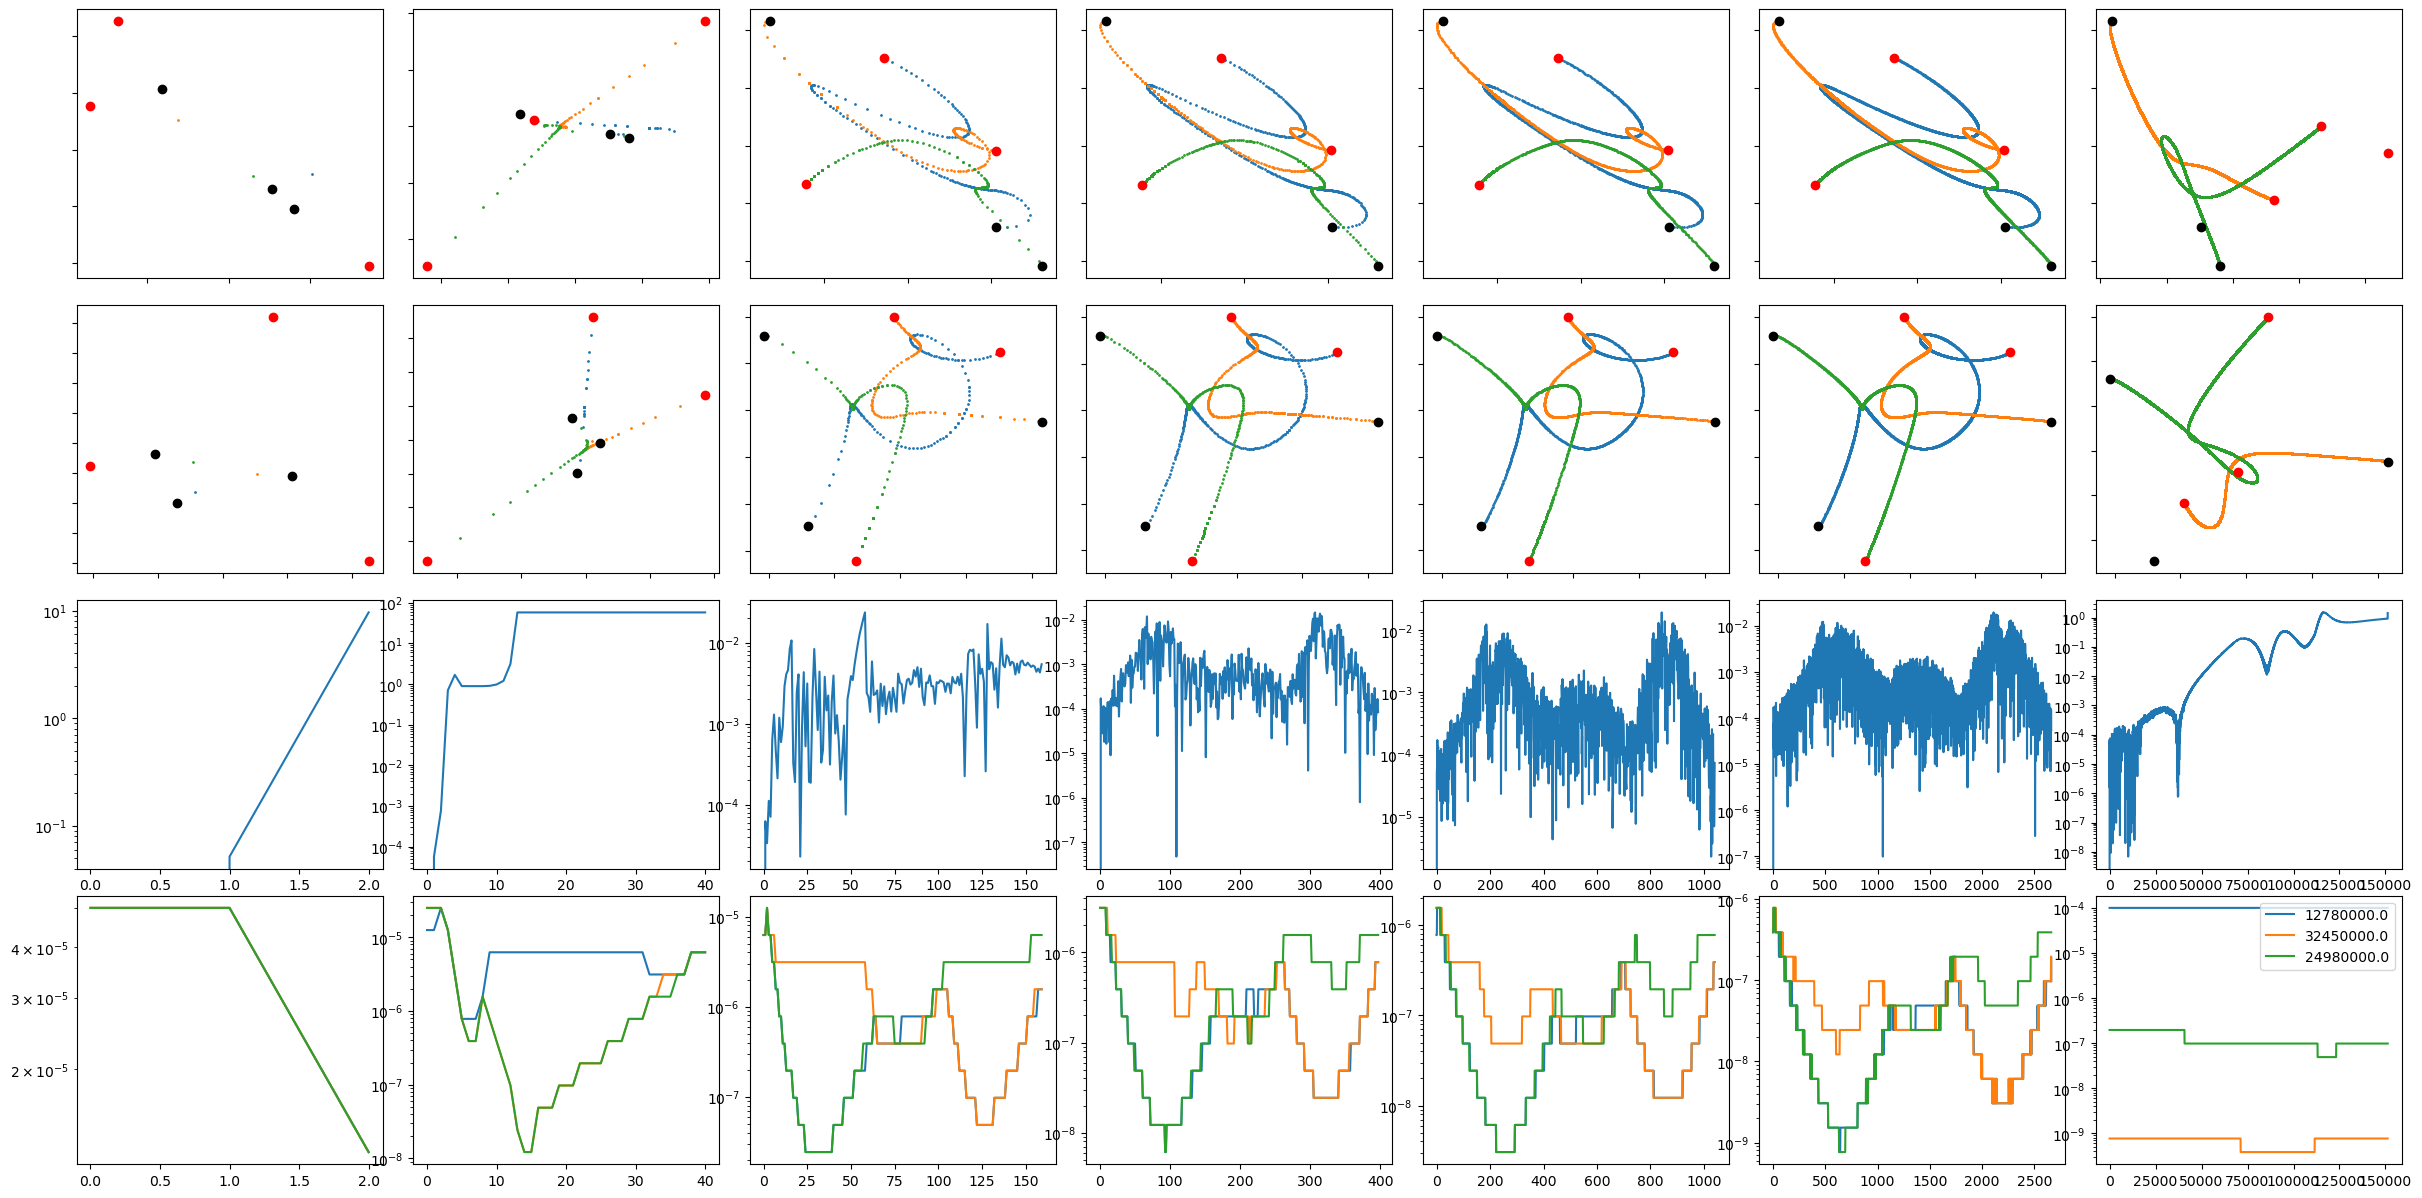

In [17]:
num_particles = 3

fig, axes = pu.generateAxesForMultiplePlots(shape=(7,4),figsize=(30,15),hspace=0.1,wspace=0.1,
                                gridspec=None)

n=0
for m in range(6):
    particles, energies = readAbyss(f"three_body_{int(n+1)}_{int(m+1)}.txt", num_particles=num_particles, time_max=1e8, energy=True)
    x=m; y=0
    #particles -> [time, PID, [mass(1), pos(3), vel(3), acc(12->3,4), dt(1)]]
    for i in range(3):
        axes[x,y].scatter(particles[0,i,1], particles[0,i,2], color="k",zorder=10)
        axes[x,y].scatter(particles[1:-1,i,1], particles[1:-1,i,2], s=1)
        axes[x,y].scatter(particles[-1,i,1], particles[-1,i,2], color="r",zorder=10)

    #axes[x,y].set_xlim(-1,1)
    #axes[x,y].set_ylim(-1,1)
    axes[x,y].set_xticklabels([])
    axes[x,y].set_yticklabels([])

    y=1
    for i in range(3):
        axes[x,y].scatter(particles[0,i,2], particles[0,i,3], color="k",zorder=10)
        axes[x,y].scatter(particles[1:-1,i,2], particles[1:-1,i,3], s=1)
        axes[x,y].scatter(particles[-1,i,2], particles[-1,i,3], color="r",zorder=10)

    #axes[x,y].set_xlim(-1,1)
    #axes[x,y].set_ylim(-1,1)
    axes[x,y].set_xticklabels([])
    axes[x,y].set_yticklabels([])
    #axes[x,y].axis("off")

    y=2
    axes[x,y].plot(range(energies.shape[0]), np.abs((energies-energies[0])/energies[0]))
    axes[x,y].set_yscale("log")

    y=3
    axes[x,y].plot(range(energies.shape[0]), particles[:,0,-1])
    axes[x,y].plot(range(energies.shape[0]), particles[:,1,-1])
    axes[x,y].plot(range(energies.shape[0]), particles[:,2,-1])
    axes[x,y].set_yscale("log")

particles,energies = readAbyss(f"three_body_{int(n+1)}_trial_2.txt", num_particles=num_particles, time_max=1e9, base_path="/mnt/home/yjo10/ceph/AITimeStepper/abyss/test_output/", energy=True)
x=6; y=0
for i in range(3):
    axes[x,y].scatter(particles[0,i,1], particles[0,i,2], color="k",zorder=10)
    axes[x,y].scatter(particles[1:-1,i,1], particles[1:-1,i,2], s=1)
    axes[x,y].scatter(particles[-1,i,1], particles[-1,i,2], color="r",zorder=10)

#axes[x,y].set_xlim(-1,1)
#axes[x,y].set_ylim(-1,1)
axes[x,y].set_xticklabels([])
axes[x,y].set_yticklabels([])

y=1
for i in range(3):
    axes[x,y].scatter(particles[0,i,2], particles[0,i,3], color="k",zorder=10)
    axes[x,y].scatter(particles[1:-1,i,2], particles[1:-1,i,3], s=1)
    axes[x,y].scatter(particles[-1,i,2], particles[-1,i,3], color="r",zorder=10)

#axes[x,y].set_xlim(-1,1)
#axes[x,y].set_ylim(-1,1)
axes[x,y].set_xticklabels([])
axes[x,y].set_yticklabels([])
#axes[x,y].axis("off")

y=2
axes[x,y].plot(range(energies.shape[0]), np.abs((energies-energies[0])/energies[0]))
axes[x,y].set_yscale("log")

y=3
axes[x,y].plot(range(energies.shape[0]), particles[:,0,-1], label=particles[0,0,0])
axes[x,y].plot(range(energies.shape[0]), particles[:,1,-1], label=particles[0,1,0])
axes[x,y].plot(range(energies.shape[0]), particles[:,2,-1], label=particles[0,2,0])
axes[x,y].set_yscale("log")
axes[x,y].legend()


In [12]:
particles

array([[[ 1.278e+07,  1.054e-01, -1.400e-01, ...,  9.428e+21,
          2.673e+22,  4.883e-08],
        [ 3.245e+07, -1.648e-01,  2.151e-01, ..., -7.912e+21,
         -2.339e+21,  2.384e-11],
        [ 2.498e+07,  1.601e-01, -2.077e-01, ...,  5.452e+21,
         -1.064e+22,  3.815e-10]],

       [[ 1.278e+07,  1.054e-01, -1.400e-01, ...,  9.428e+21,
          2.673e+22,  4.883e-08],
        [ 3.245e+07, -1.648e-01,  2.151e-01, ...,  2.619e+24,
          4.636e+24,  2.384e-11],
        [ 2.498e+07,  1.601e-01, -2.077e-01, ...,  5.452e+21,
         -1.064e+22,  3.815e-10]],

       [[ 1.278e+07,  1.054e-01, -1.400e-01, ...,  9.428e+21,
          2.673e+22,  4.883e-08],
        [ 3.245e+07, -1.648e-01,  2.151e-01, ..., -3.494e+24,
          2.868e+23,  2.384e-11],
        [ 2.498e+07,  1.601e-01, -2.077e-01, ...,  5.452e+21,
         -1.064e+22,  3.815e-10]],

       ...,

       [[ 1.278e+07,  1.327e-01, -1.382e-01, ..., -2.897e+20,
          1.436e+22,  4.883e-08],
        [ 3.245e+07, 

In [33]:
particles[0,:,0] this result shows that mass matters when it comes to energy conservation

array([12780000., 32450000., 24980000.])

In [ ]:
#let's add energy conservation down there